Here we are going to work through Nick Cullum's Titanic Data tutorial

In [1]:
#Import open libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
titanic_data = pd.read_csv('titanic_train.csv')

In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

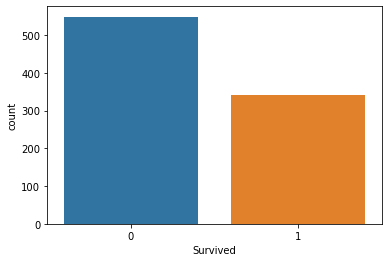

In [4]:
sns.countplot(x='Survived', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

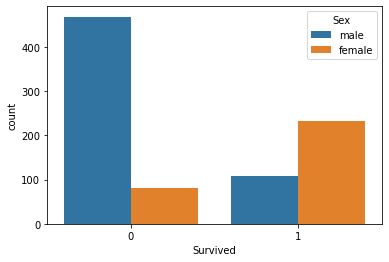

In [5]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

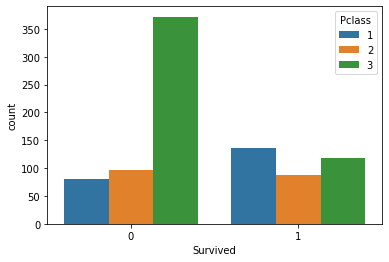

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

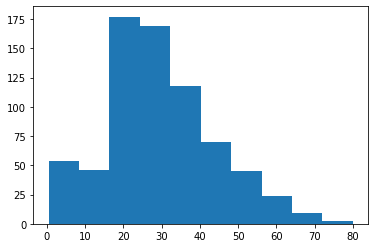

In [9]:
plt.hist(titanic_data['Age'].dropna())

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

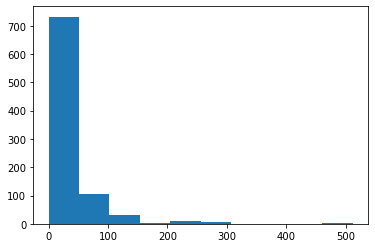

In [10]:
plt.hist(titanic_data['Fare'])

In [11]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

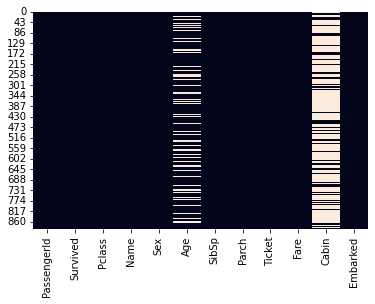

In [12]:
sns.heatmap(titanic_data.isnull(), cbar=False)

/home/a.b.mostert/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

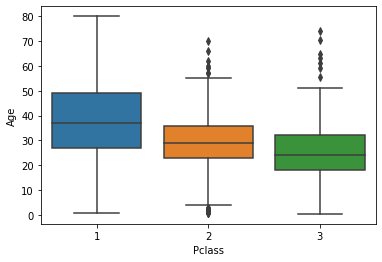

In [16]:
sns.boxplot(titanic_data['Pclass'], titanic_data['Age'])

In [48]:
def impute_missing_age(columns):
    
    age = columns[0]
    
    passenger_class = columns[1]
    
    
    if pd.isnull(age):
        
        if passenger_class == 1:
            
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        
        elif passenger_class == 2:
            
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
 
        elif passenger_class == 3:

            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
        
    else:
        return age

In [51]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_missing_age, axis=1)

<AxesSubplot:>

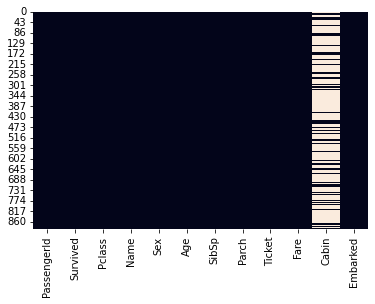

In [56]:
sns.heatmap(titanic_data.isnull(), cbar=False)

In [57]:
titanic_data.drop('Cabin', axis = 1, inplace=True)

In [58]:
titanic_data.dropna(inplace=True)

In [60]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


since we have multicolinearity, ie, female column perfectly predicts the male column and vice versa, we should only use only column

In [61]:
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

In [67]:
embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first=True)

In [69]:
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis=1)

In [71]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [73]:
titanic_data.drop(['Name', 'Ticket', 'Sex', 'Embarked', 'Fare'], axis = 1, inplace=True)

In [75]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male',
       'Q', 'S'],
      dtype='object')


In [76]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,1,0,3,22.00000,1,0,1,0,1
1,2,1,1,38.00000,1,0,0,0,0
2,3,1,3,26.00000,0,0,0,0,1
3,4,1,1,35.00000,1,0,0,0,1
4,5,0,3,35.00000,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,1,0,1
887,888,1,1,19.00000,0,0,0,0,1
888,889,0,3,25.14062,1,2,0,0,1
889,890,1,1,26.00000,0,0,1,0,0


we will now do the test and train data. We want to predict survival, and use all the other data to help predict

In [77]:
y_data = titanic_data['Survived']

x_data = titanic_data.drop('Survived', axis = 1)

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [83]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression(max_iter=1000)

In [87]:
model.fit(x_training_data, y_training_data)

LogisticRegression(max_iter=1000)

In [88]:
predictions = model.predict(x_test_data)

In [89]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       158
           1       0.75      0.68      0.71       109

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.78      0.77       267



In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
print(confusion_matrix(y_test_data, predictions))

[[133  25]
 [ 35  74]]
